## Week one - https://github.com/andri27-ts/60_Days_RL_Challenge#week-1---introduction

Please watch the videos of week one before see the code

My code follow this blog https://towardsdatascience.com/from-scratch-ai-balancing-act-in-50-lines-of-python-7ea67ef717


### To install environment
conda install -c akode gym 

## Code time:

In [1]:
import gym

In [2]:
env = gym.make('CartPole-v0')
env.reset()
for _ in range(200):
    env.render()
    env.step(env.action_space.sample()) # take a random action
env.close()

/home/user/.conda/envs/RF/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


## Read time:
https://gym.openai.com/docs/

Key words: Observations, Action Space

State: A state is what the game looks like at the moment. We typically deal with numerical representation of games.

Policy: A policy is a function that can take the state of the game (ex. position of board pieces, or where the cart and pole are) and output the action the agent should take in the position (ex. move the knight, or push the cart to the left).

## Code time:

In [3]:
env = gym.make('CartPole-v0')
for i_episode in range(5):
    observation = env.reset()
    for t in range(1000):
        env.render()
        # take random action
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

Episode finished after 34 timesteps
Episode finished after 33 timesteps
Episode finished after 13 timesteps
Episode finished after 10 timesteps
Episode finished after 25 timesteps


In [4]:
# we only get less than 100 steps if we use random action.

### Spaces: action space and observation space
In the examples above, we’ve been sampling random actions from the environment’s action space.

But what actually are those actions? Every environment comes with an action_space and an observation_space. 

These attributes are of type Space, and they describe the format of valid actions and observations.

In [5]:
env = gym.make('CartPole-v0', )
print(f"We have {env.action_space} actions: pushing the cart left or right")
print(f"State have {env.observation_space} values: cart_position, cart_velocity, pole_angle, pole_velocity")

We have Discrete(2) actions: pushing the cart left or right
State have Box(4,) values: cart_position, cart_velocity, pole_angle, pole_velocity


In [6]:
# and limit of space:
print(env.observation_space.high)
print(env.observation_space.low)

[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


In the case of cart pole, our state is composed of 4 numbers: 
 - the position of the cart.
 - the speed of the cart.
 - the position of the pole (as an angle).
 - the angular velocity of the pole. 

In [7]:
def print_state(state):
    [cart_position, cart_velocity, pole_angle, pole_velocity] = state
    print(f"cart_position: {cart_position}, \ncart_velocity: {cart_velocity} \npole_angle {pole_angle}, \npole_velocity {pole_velocity}")

In [8]:
state = env.reset()
print_state(state)

cart_position: 0.04359785474820241, 
cart_velocity: 0.018802304126176964 
pole_angle -0.03908218937460955, 
pole_velocity 0.033135432915376684


In [9]:
class Policy():
    def __init__(self, env):
        self.action_space = env.action_space
        self.action_names = ['left', 'right']
    def get_next_action(self, state):
        pass
    def get_name(self, action):
        return self.action_names[action]
    def print_state(self, state):
        [cart_position, cart_velocity, pole_angle, pole_velocity] = state
        print(f"cart_position: {cart_position}, \ncart_velocity: {cart_velocity} \npole_angle {pole_angle}, \npole_velocity {pole_velocity}")

In [10]:
## Create a random policy:
class RandomPolicy(Policy):
    def get_next_action(self, state):
        action = self.action_space.sample()
        return action

In [11]:
env = gym.make('CartPole-v0')
random_policy = RandomPolicy(env)

In [12]:
for i in range(3):
    observation = env.reset()
    action = random_policy.get_next_action(observation)
    random_policy.print_state(observation)
    print(random_policy.get_name(action))
    print('\n==========\n')

cart_position: -0.040489677292753594, 
cart_velocity: -0.0017911505501419095 
pole_angle -0.01906615163274733, 
pole_velocity 0.013454913819935799
right


cart_position: 0.01792027537687163, 
cart_velocity: 0.049595158271136364 
pole_angle -0.023119581956618285, 
pole_velocity -0.014386709235517173
right


cart_position: 0.006687556486496507, 
cart_velocity: 0.003749312349641952 
pole_angle 0.04117240419634395, 
pole_velocity 0.015855296707534258
right




In [13]:
for i_episode in range(5):
    observation = env.reset()
    for t in range(1000):
        env.render()
        # take random action
        action = random_policy.get_next_action(observation)
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

Episode finished after 18 timesteps
Episode finished after 26 timesteps
Episode finished after 36 timesteps
Episode finished after 13 timesteps
Episode finished after 30 timesteps


In [14]:
# all fail after less than 50 steps!!!

In [15]:
from PIL import Image

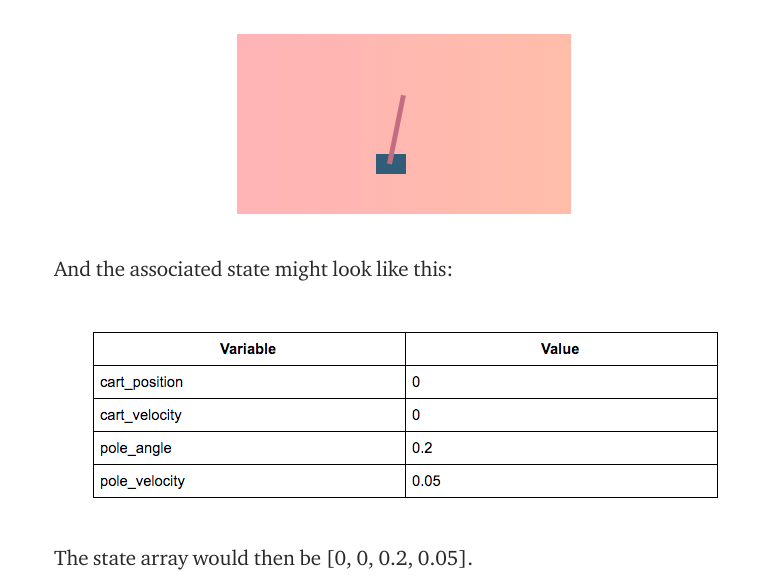

In [16]:
Image.open("./sample_state.png")

Now intuitively, we’ll want to straighten the pole back up by pushing the cart to the right. 

I’ve taken a good policy from one of my training runs and 

its policy array reads: [-0.116, 0.332, 0.207 0.352]. 

Let’s do the math real quick by hand and see what this policy will output as an action for this state.



In [17]:
## Create a statistic policy:
import numpy as np
class StatisticPolicy(Policy):
    def __init__(self, env, policy):
        self.action_space = env.action_space
        self.policy = policy
        self.action_names = ['left', 'right']
    
    def update_policy(self, policy):
        self.policy = policy
        
    def get_next_action(self, state):
        action = np.dot(state, self.policy)
        if action < 0:
            return 0 # pushing to the left
        else:
            return 1 # pushing to the right

In [18]:
statistic_policy = StatisticPolicy(env, np.array([-0.116, 0.332, 0.207, 0.352]))

In [19]:
for i in range(3):
    observation = env.reset()
    action = statistic_policy.get_next_action(observation)
    statistic_policy.print_state(observation)
    print(statistic_policy.get_name(action))
    print('\n==========\n')

cart_position: -0.015106649888446198, 
cart_velocity: -0.03757811824984077 
pole_angle 0.02238285735765136, 
pole_velocity 0.045793804614445655
right


cart_position: -0.0011923728953741053, 
cart_velocity: 0.035082233652551295 
pole_angle 0.01079520829672189, 
pole_velocity -0.016994300293552665
right


cart_position: 0.013754574446472365, 
cart_velocity: -0.01241078533170329 
pole_angle -0.038683524093090664, 
pole_velocity 0.033189973361485464
left




In [20]:
info

{}

In [21]:
for i_episode in range(3):
    observation = env.reset()
    for t in range(10000):
        env.render()
        # take random action
        action = statistic_policy.get_next_action(observation)
        observation, reward, done, info = env.step(action)
#         print(done, reward, observation)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

Episode finished after 200 timesteps
Episode finished after 200 timesteps
Episode finished after 200 timesteps


In [22]:
# The max_episode_steps only 200 steps. We can only play 200 steps for each game.

In [23]:
# let set max episode steps = 500
env._max_episode_steps = 500

for i_episode in range(3):
    observation = env.reset()
    for t in range(10000):
        env.render()
        action = statistic_policy.get_next_action(observation)
        observation, reward, done, info = env.step(action)
#         print(done, reward, observation)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps


In [24]:
# let make the code easy to read:
def play(env, policy):
    for i_episode in range(3):
        observation = env.reset()
        for t in range(10000):
            env.render()
            action = policy.get_next_action(observation)
            observation, reward, done, info = env.step(action)
    #         print(done, reward, observation)
            if done:
                print("Episode finished after {} timesteps".format(t+1))
                break
    env.close()

In [25]:
env._max_episode_steps = 500
play(env, statistic_policy)

Episode finished after 500 timesteps
Episode finished after 500 timesteps
Episode finished after 500 timesteps


## Policy Search
How to find good policy search

In [26]:
print(env.observation_space.high)
print(env.observation_space.low)

[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


In [27]:
# cart_position: 0.019116420545397472, 
# cart_velocity: -0.009272760733395932 
# pole_angle 0.03902117151277583, 
# pole_velocity -0.008606676659720348

In [28]:
# we can check all posible policy
# cart_position in range [-4.8, 4.8]
# cart_velocity in range [-3, 3]
# pole_angle in range [-.4, .4]
# pole_velocity in range [-4, 4]
def create_range(min_value, max_value, step = 1.0):
    return np.arange(min_value, max_value, step)

cart_positions = create_range(-3, 3)
cart_velocities = create_range(-3, 3)
pole_angles = create_range(-3, 3)
pole_velocities = create_range(-3, 3)

In [219]:
def play(env, policy, n=10, render=True):
    scores = []
    for i_episode in range(n):
        observation = env.reset()
        for t in range(1000):
            if render:
                env.render()
            action = policy.get_next_action(observation)
            observation, reward, done, info = env.step(action)
            if done:
                scores.append(t)
                break
    env.close()
    return min(scores)

In [118]:
play(env, RandomPolicy(env))

9

In [119]:
def validate_policy(env, cart_positions, cart_velocities, pole_angles, pole_velocities):
    statistic_policy = StatisticPolicy(env, np.array([0,0,0,0]))
    count = 0
    result = []
    for cart_position in cart_positions:
        for cart_velocity in cart_velocities:
            for pole_angle in pole_angles:
                for pole_velocity in pole_velocities:
                    policy_array = np.array([cart_position, cart_velocity, pole_angle, pole_velocity])
                    statistic_policy.update_policy(policy_array)
                    score = play(env, statistic_policy, render=False)
                    result.append((score, policy_array))
                    count = count + 1
    print(count)
    return result

In [120]:
cart_positions = create_range(-3, 3)
cart_velocities = create_range(-3, 3)
pole_angles = create_range(-3, 3)
pole_velocities = create_range(-3, 3)
result = validate_policy(env, cart_positions, cart_velocities, pole_angles, pole_velocities)

1296


In [121]:
# check number of policy > 100, > 200:
print(len([score for score, _ in result if score > 200]),len([score for score, _ in result if score > 300]), len([score for score, _ in result if score > 490])) 

21 14 10


In [122]:
max([score for score, _ in result])

499

In [123]:
# let do some statistic on the best policy:
best_policy_array = [policy_array for score, policy_array in result if score > 300]

In [149]:
# check some best_policy_array:
statistic_policy.update_policy(best_policy_array[1])
play(env, statistic_policy, render=False)

363

In [150]:
t = np.stack(best_policy_array)

In [151]:
mins, maxs = t.min(axis=0), t.max(axis=0)
mins, maxs

(array([-1.,  0.,  0.,  1.]), array([1., 2., 2., 2.]))

In [154]:
positions = [create_range(i,j,.2) for i,j in zip(mins,maxs)]

In [155]:
positions

[array([-1.00000000e+00, -8.00000000e-01, -6.00000000e-01, -4.00000000e-01,
        -2.00000000e-01, -2.22044605e-16,  2.00000000e-01,  4.00000000e-01,
         6.00000000e-01,  8.00000000e-01]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8]),
 array([1. , 1.2, 1.4, 1.6, 1.8])]

In [156]:
result = validate_policy(env, *positions)

5000


In [157]:
# check number of policy > 100, > 200:
print(len([score for score, _ in result if score > 200]),len([score for score, _ in result if score > 300]), len([score for score, _ in result if score > 490])) 

2776 1958 1232


In [221]:
# only choose the policies have score > 400:
print('max score', max([score for score, _ in result]))
best_policy_array = [policy_array for score, policy_array in result if score > 480]

max score 499


In [245]:
# check some best_policy_array:
statistic_policy.update_policy(best_policy_array[2])
play(env, statistic_policy, render=False)

441

In [246]:
len(best_policy_array)

139

In [253]:
# We have 139 promised policies, we will run test on it 100 times and accept that policy if all scores > 499.
accepted_array = []
for array in best_policy_array:
    statistic_policy.update_policy(array)
    min_score = play(env, statistic_policy, n=100, render=False)
    if min_score == 499:
        accepted_array.append(array)

In [255]:
len(accepted_array)

120

In [265]:
import random
statistic_policy.update_policy(accepted_array[random.randint(0, len(accepted_array))])
play(env, statistic_policy, n=100, render=False)

499